In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Para obtener las funciones KOG de los genes dimórficos-parálogos, se van a ancesitar tres archivos:
    1- El archivo de los clusters.
    2- el archivo KOG o GO.

**Genes dimórficos-parálogos**

In [2]:
clusters_dimorficos=pd.read_csv("clusters_dimorficos.csv")
clusters_dimorficos.head(3)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Protein,NumberProteins,NumberProteins_filtered
0,4,4,8,Cluster 4,1354593,3.780186,Levadura,Mucci_1354593,2,2
1,5,5,9,Cluster 4,1446136,-1.234239,Micelio,Mucci_1446136,2,2
2,30,30,57,Cluster 27,1350558,2.609232,Levadura,Mucci_1350558,3,2


In [3]:
# Hacer el merge de los datos de clusters dimórficos con los datos de funciones KOG
kog_mucor = pd.read_csv("kog_mucor.csv", sep = ";")
# quedarnos solo con las filas únicas del dataframe de KOG
kog_mucor = kog_mucor.drop_duplicates(subset="proteinId", keep='first')
kog_clusters_dimorficos = pd.merge(clusters_dimorficos, kog_mucor, left_on="ID", right_on="proteinId")
kog_clusters_dimorficos.head(3)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Protein,NumberProteins,NumberProteins_filtered,transcriptId,proteinId,kogid,kogdefline,kogClass,kogGroup
0,4,4,8,Cluster 4,1354593,3.780186,Levadura,Mucci_1354593,2,2,1355047,1354593,KOG1206,Peroxisomal multifunctional beta-oxidation pro...,Lipid transport and metabolism,METABOLISM
1,5,5,9,Cluster 4,1446136,-1.234239,Micelio,Mucci_1446136,2,2,1446590,1446136,KOG1206,Peroxisomal multifunctional beta-oxidation pro...,Lipid transport and metabolism,METABOLISM
2,30,30,57,Cluster 27,1350558,2.609232,Levadura,Mucci_1350558,3,2,1351012,1350558,KOG1448,Ribose-phosphate pyrophosphokinase,Amino acid transport and metabolism,METABOLISM


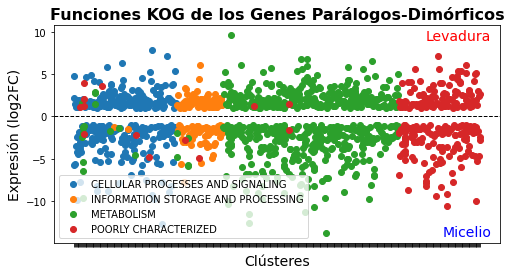

In [16]:
# Seleccionar las columnas ID, Expression y KOGgroup
datos_agrupar = kog_clusters_dimorficos[["Cluster", "Expression", "kogGroup"]]
datos_agrupar
# Agrupar los datos por KOGgroup
agrupado_por_kogGroup = datos_agrupar.groupby("kogGroup")
import matplotlib.pyplot as plt

# Definir el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 4))

# Recorrer cada grupo
for kogGroup, datos_grupo in agrupado_por_kogGroup:
    # Obtener los IDs y la expresión génica para el grupo actual
    ids_genes = datos_grupo["Cluster"].to_list()
    expresion_genes = datos_grupo["Expression"].to_list()

    # Crear un diagrama de dispersión para el grupo actual
    ax.scatter(ids_genes, expresion_genes, label=kogGroup)

# Añadir título y etiquetas (en inglés)
#plt.title('KOG functions of the Paralogs-Dimorphic genes', fontsize=12, weight='bold')
plt.title('Funciones KOG de los Genes Parálogos-Dimórficos', fontsize=16, weight='bold')
ax.set_xlabel("Clústeres", fontsize=14)
ax.set_xticklabels([])  # Eliminar las etiquetas de los ticks

ax.set_ylabel("Expresión (log2FC)", fontsize=14)

# Añadir línea horizontal en y=0
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
# Añadir anotaciones para Yeast y Mycelium en el lado izquierdo
ax.annotate('Levadura', xy=(0.98, 0.95), xycoords='axes fraction', fontsize=14, color='red', ha='right', va='center')
ax.annotate('Micelio', xy=(0.98, 0.05), xycoords='axes fraction', fontsize=14, color='blue', ha='right', va='center')


# Agregar leyenda fuera del gráfico
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
# Personalizar la leyenda
#leyenda = ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0.5, -0.15), ncol=1)  # Colocar la leyenda debajo del gráfico con cuatro columna
leyenda = ax.legend(fontsize=12, loc='best')
# Agregar leyenda
ax.legend()

# Guardar la imagen como SVG
plt.savefig('clus_vs_expr_kogGroup.svg', format='svg')

# Mostrar la figura
plt.show()

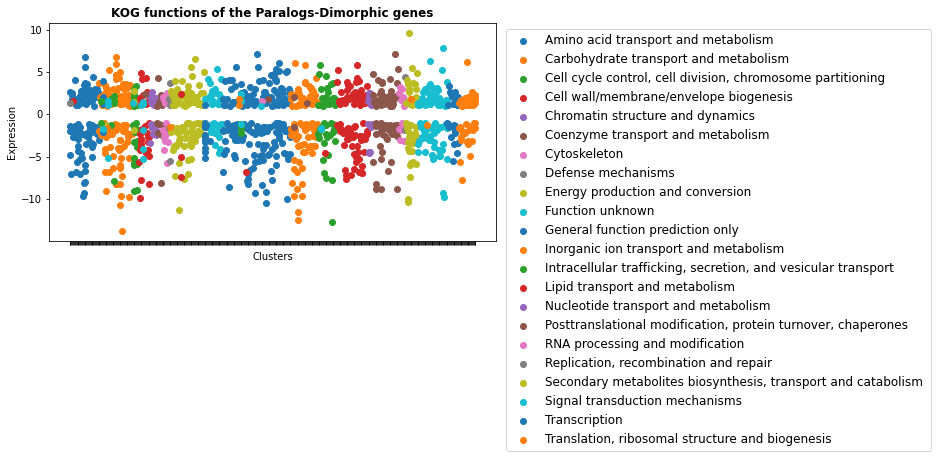

In [17]:
import matplotlib.pyplot as plt
# Seleccionar las columnas ID, Expression y KOGgroup
datos_agrupar = kog_clusters_dimorficos[["Cluster", "Expression", "kogClass"]]
datos_agrupar
# Agrupar los datos por KOGgroup
agrupado_por_kogGroup = datos_agrupar.groupby("kogClass")
import matplotlib.pyplot as plt

# Definir el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 4))

# Recorrer cada grupo
for kogGroup, datos_grupo in agrupado_por_kogGroup:
    # Obtener los IDs y la expresión génica para el grupo actual
    ids_genes = datos_grupo["Cluster"].to_list()
    expresion_genes = datos_grupo["Expression"].to_list()

    # Crear un diagrama de dispersión para el grupo actual
    ax.scatter(ids_genes, expresion_genes, label=kogGroup)

# Añadir título y etiquetas (en inglés)
plt.title('KOG functions of the Paralogs-Dimorphic genes', fontsize=12, weight='bold')
ax.set_xlabel("Clusters", fontsize=10)
ax.set_xticklabels([])  # Eliminar las etiquetas de los ticks

ax.set_ylabel("Expression", fontsize=10)

# Agregar leyenda fuera del gráfico y a la derecha
leyenda = ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.01, 1))

# Guardar la imagen como SVG
plt.savefig('clus_vs_expr_kogClass.svg', format='svg', bbox_inches='tight')

# Mostrar la figura
plt.show()


**Genes diferencialmente expresados**

In [18]:
def merge_kog_clusters(kog_file, clusters_file):
    """
    Función para realizar el merge de los datos de clusters dimórficos con los datos de funciones KOG.
    
    Parameters:
    kog_file (str): Nombre del archivo CSV que contiene los datos KOG.
    clusters_file (str): Nombre del archivo CSV que contiene los datos de clusters dimórficos.
    output_file (str): Nombre del archivo CSV donde se guardarán los datos combinados.
    
    Returns:
    pd.DataFrame: DataFrame con los datos combinados.
    """
    # Leer el archivo KOG
    kog_mucor = pd.read_csv(kog_file, sep=";")
    
    # Eliminar filas duplicadas basadas en 'proteinId', manteniendo la primera ocurrencia
    kog_mucor = kog_mucor.drop_duplicates(subset="proteinId", keep='first')
    
    # Leer el archivo de clusters dimórficos
    clusters_dimorficos = pd.read_csv(clusters_file)
    clusters_dimorficos = clusters_dimorficos[clusters_dimorficos["Morfologia"] !="Not_differential"]
    # Realizar el merge de los datos
    kog_clusters_dimorficos = pd.merge(clusters_dimorficos, kog_mucor, left_on="ID", right_on="proteinId")
    
    return kog_clusters_dimorficos

In [19]:
kog_clusters_con_morfologia = merge_kog_clusters("kog_mucor.csv", "clusters_con_morfologia.csv")
kog_clusters_con_morfologia.head(3)


,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Protein,NumberProteins,transcriptId,proteinId,kogid,kogdefline,kogClass,kogGroup
0,1,2,Cluster 1,1362638,-1.868635,Mycelium,Mucci_1362638,1,1363092,1362638,KOG1808,AAA ATPase containing von Willebrand factor ty...,General function prediction only,POORLY CHARACTERIZED
1,2,4,Cluster 2,1452460,-2.115389,Mycelium,Mucci_1452460,1,1452914,1452460,KOG3595,"Dyneins, heavy chain",Cytoskeleton,CELLULAR PROCESSES AND SIGNALING
2,4,8,Cluster 4,1354593,3.780186,Yeast,Mucci_1354593,2,1355047,1354593,KOG1206,Peroxisomal multifunctional beta-oxidation pro...,Lipid transport and metabolism,METABOLISM


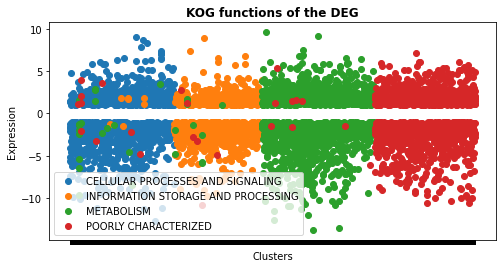

In [20]:
# Seleccionar las columnas ID, Expression y KOGgroup
datos_agrupar = kog_clusters_con_morfologia[["Cluster", "Expression", "kogGroup"]]
datos_agrupar
# Agrupar los datos por KOGgroup
agrupado_por_kogGroup = datos_agrupar.groupby("kogGroup")
import matplotlib.pyplot as plt

# Definir el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 4))

# Recorrer cada grupo
for kogGroup, datos_grupo in agrupado_por_kogGroup:
    # Obtener los IDs y la expresión génica para el grupo actual
    ids_genes = datos_grupo["Cluster"].to_list()
    expresion_genes = datos_grupo["Expression"].to_list()

    # Crear un diagrama de dispersión para el grupo actual
    ax.scatter(ids_genes, expresion_genes, label=kogGroup)

# Añadir título y etiquetas (en inglés)
plt.title('KOG functions of the DEG', fontsize=12, weight='bold')
ax.set_xlabel("Clusters", fontsize=10)
ax.set_xticklabels([])  # Eliminar las etiquetas de los ticks

ax.set_ylabel("Expression", fontsize=10)

# Agregar leyenda fuera del gráfico
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
# Personalizar la leyenda
#leyenda = ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0.5, -0.15), ncol=1)  # Colocar la leyenda debajo del gráfico con cuatro columna
leyenda = ax.legend(fontsize=12, loc='best')
# Agregar leyenda
ax.legend()

# Guardar la imagen como SVG
plt.savefig('clus_vs_expr_kogGroup_lev_mic.svg', format='svg')

# Mostrar la figura
plt.show()

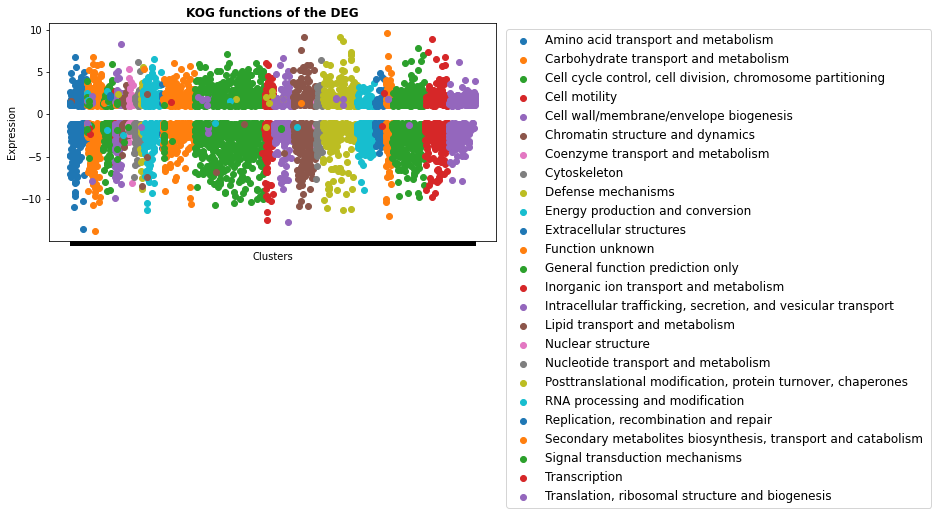

In [21]:
import matplotlib.pyplot as plt
# Seleccionar las columnas ID, Expression y KOGgroup
datos_agrupar = kog_clusters_con_morfologia[["Cluster", "Expression", "kogClass"]]
datos_agrupar
# Agrupar los datos por KOGgroup
agrupado_por_kogGroup = datos_agrupar.groupby("kogClass")
import matplotlib.pyplot as plt

# Definir el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 4))

# Recorrer cada grupo
for kogGroup, datos_grupo in agrupado_por_kogGroup:
    # Obtener los IDs y la expresión génica para el grupo actual
    ids_genes = datos_grupo["Cluster"].to_list()
    expresion_genes = datos_grupo["Expression"].to_list()

    # Crear un diagrama de dispersión para el grupo actual
    ax.scatter(ids_genes, expresion_genes, label=kogGroup)

# Añadir título y etiquetas (en inglés)
plt.title('KOG functions of the DEG', fontsize=12, weight='bold')
ax.set_xlabel("Clusters", fontsize=10)
ax.set_xticklabels([])  # Eliminar las etiquetas de los ticks

ax.set_ylabel("Expression", fontsize=10)

# Agregar leyenda fuera del gráfico y a la derecha
leyenda = ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.01, 1))

# Guardar la imagen como SVG
plt.savefig('clus_vs_expr_kogClass_lev_mic.svg', format='svg', bbox_inches='tight')

# Mostrar la figura
plt.show()


**clusters que sólo contienen genes de levadura**
Se van a analizar todos los genes que pertenecen a clusters tanto 1 como dos proteínas. 

In [22]:
kog_clusters_only_yeast_df_all= merge_kog_clusters("kog_mucor.csv", "clusters_only_yeast_df_all.csv")
kog_clusters_only_yeast_df_all.head(3)

,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,transcriptId,proteinId,kogid,kogdefline,kogClass,kogGroup
0,11,20,Cluster 9,1562135,1.411270,Levadura,1562589,1562135,KOG1809,Vacuolar protein sorting-associated protein,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING
1,19,35,Cluster 16,1142208,1.405570,Levadura,1142662,1142208,KOG1809,Vacuolar protein sorting-associated protein,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING
2,26,49,Cluster 23,1053451,1.747954,Levadura,1053905,1053451,KOG1910,Uncharacterized conserved protein,Function unknown,POORLY CHARACTERIZED


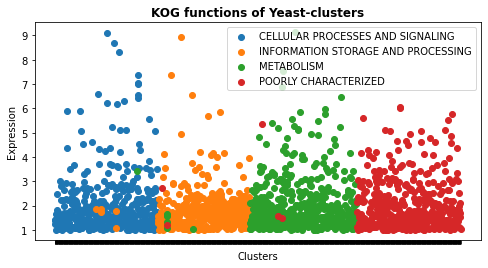

In [23]:
# Seleccionar las columnas ID, Expression y KOGgroup
datos_agrupar = kog_clusters_only_yeast_df_all[["Cluster", "Expression", "kogGroup"]]
datos_agrupar
# Agrupar los datos por KOGgroup
agrupado_por_kogGroup = datos_agrupar.groupby("kogGroup")
import matplotlib.pyplot as plt

# Definir el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 4))

# Recorrer cada grupo
for kogGroup, datos_grupo in agrupado_por_kogGroup:
    # Obtener los IDs y la expresión génica para el grupo actual
    ids_genes = datos_grupo["Cluster"].to_list()
    expresion_genes = datos_grupo["Expression"].to_list()

    # Crear un diagrama de dispersión para el grupo actual
    ax.scatter(ids_genes, expresion_genes, label=kogGroup)

# Añadir título y etiquetas (en inglés)
plt.title('KOG functions of Yeast-clusters', fontsize=12, weight='bold')
ax.set_xlabel("Clusters", fontsize=10)
ax.set_xticklabels([])  # Eliminar las etiquetas de los ticks

ax.set_ylabel("Expression", fontsize=10)

# Agregar leyenda fuera del gráfico
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
# Personalizar la leyenda
#leyenda = ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0.5, -0.15), ncol=1)  # Colocar la leyenda debajo del gráfico con cuatro columna
leyenda = ax.legend(fontsize=12, loc='best')
# Agregar leyenda
ax.legend()

# Guardar la imagen como SVG
plt.savefig('clus_vs_expr_kogGroup_only_yeast_all.svg', format='svg')

# Mostrar la figura
plt.show()

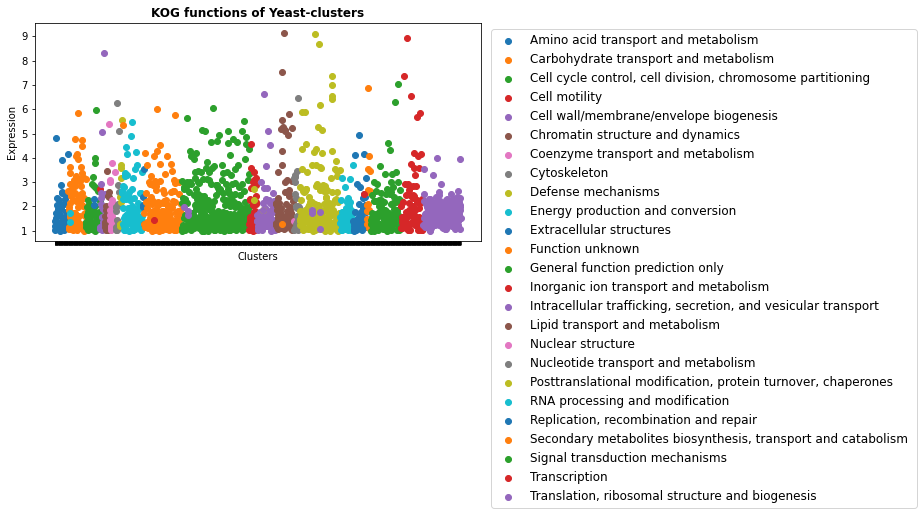

In [24]:
import matplotlib.pyplot as plt
# Seleccionar las columnas ID, Expression y KOGgroup
datos_agrupar = kog_clusters_only_yeast_df_all[["Cluster", "Expression", "kogClass"]]
datos_agrupar
# Agrupar los datos por KOGgroup
agrupado_por_kogGroup = datos_agrupar.groupby("kogClass")
import matplotlib.pyplot as plt

# Definir el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 4))

# Recorrer cada grupo
for kogGroup, datos_grupo in agrupado_por_kogGroup:
    # Obtener los IDs y la expresión génica para el grupo actual
    ids_genes = datos_grupo["Cluster"].to_list()
    expresion_genes = datos_grupo["Expression"].to_list()

    # Crear un diagrama de dispersión para el grupo actual
    ax.scatter(ids_genes, expresion_genes, label=kogGroup)

# Añadir título y etiquetas (en inglés)
plt.title('KOG functions of Yeast-clusters', fontsize=12, weight='bold')
ax.set_xlabel("Clusters", fontsize=10)
ax.set_xticklabels([])  # Eliminar las etiquetas de los ticks

ax.set_ylabel("Expression", fontsize=10)

# Agregar leyenda fuera del gráfico y a la derecha
leyenda = ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.01, 1))

# Guardar la imagen como SVG
plt.savefig('clus_vs_expr_kogClass_only_yeast_all.svg', format='svg', bbox_inches='tight')

# Mostrar la figura
plt.show()


**Genes H2H implicados en el dimorfismo**

In [25]:
#Leer el dt de los genes H2H dimórficos
genes_H2H_dimorficos=pd.read_csv("vec_dimorficos.csv")
genes_H2H_dimorficos

,Gen_ID,Vecinos
0,1458659,[1458664]
1,1457033,[1347260]
2,1520146,[1520149]
3,1497021,[1497033]
4,1548982,[1548977]
5,1452120,[1549906]
6,1506145,[1447584]
7,1547701,[1547714]
8,1456582,[1456584]
9,1489536,[1489534]


In [26]:
# hacer el merge con los clusters
clusters_con_morfologia = pd.read_csv("clusters_con_morfologia.csv")
clusters_H2H_dimorficos_mor = pd.merge(clusters_con_morfologia, genes_H2H_dimorficos, left_on="ID", right_on="Gen_ID", how="inner")
clusters_H2H_dimorficos_mor

,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Protein,NumberProteins,Gen_ID,Vecinos
0,141,250,Cluster 109,1458659,1.097898,Yeast,Mucci_1458659,2,1458659,[1458664]
1,394,680,Cluster 286,1457033,-2.960365,Mycelium,Mucci_1457033,14,1457033,[1347260]
2,461,786,Cluster 325,1520146,3.624135,Yeast,Mucci_1520146,2,1520146,[1520149]
3,516,876,Cluster 360,1497021,-1.804724,Mycelium,Mucci_1497021,2,1497021,[1497033]
4,1427,2442,Cluster 1015,1548982,1.075253,Yeast,Mucci_1548982,2,1548982,[1548977]
5,2123,3642,Cluster 1519,1452120,1.278781,Yeast,Mucci_1452120,2,1452120,[1549906]
6,2980,5148,Cluster 2168,1506145,-1.435456,Mycelium,Mucci_1506145,6,1506145,[1447584]
7,3236,5599,Cluster 2363,1547701,-1.457965,Mycelium,Mucci_1547701,3,1547701,[1547714]
8,3310,5711,Cluster 2401,1456582,1.345862,Yeast,Mucci_1456582,6,1456582,[1456584]
9,3311,5712,Cluster 2401,1489536,-7.848910,Mycelium,Mucci_1489536,6,1489536,[1489534]


In [ ]:
# hacer el merge con el kog

In [27]:

# Leer el archivo KOG
kog_mucor = pd.read_csv("kog_mucor.csv", sep=";")
    
# Eliminar filas duplicadas basadas en 'proteinId', manteniendo la primera ocurrencia
kog_mucor = kog_mucor.drop_duplicates(subset="proteinId", keep='first')
    
# Realizar el merge de los datos
kog_clusters_H2H_dimorficos = pd.merge(clusters_H2H_dimorficos_mor, kog_mucor, left_on="Gen_ID", right_on="proteinId", how="left")
    
kog_clusters_dimorficos

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Cluster,ID,Expression,Morfologia,Protein,NumberProteins,NumberProteins_filtered,transcriptId,proteinId,kogid,kogdefline,kogClass,kogGroup
0,4,4,8,Cluster 4,1354593,3.780186,Levadura,Mucci_1354593,2,2,1355047,1354593,KOG1206,Peroxisomal multifunctional beta-oxidation pro...,Lipid transport and metabolism,METABOLISM
1,5,5,9,Cluster 4,1446136,-1.234239,Micelio,Mucci_1446136,2,2,1446590,1446136,KOG1206,Peroxisomal multifunctional beta-oxidation pro...,Lipid transport and metabolism,METABOLISM
2,30,30,57,Cluster 27,1350558,2.609232,Levadura,Mucci_1350558,3,2,1351012,1350558,KOG1448,Ribose-phosphate pyrophosphokinase,Amino acid transport and metabolism,METABOLISM
3,31,31,58,Cluster 27,1515105,-1.372319,Micelio,Mucci_1515105,3,2,1515559,1515105,KOG1448,Ribose-phosphate pyrophosphokinase,Amino acid transport and metabolism,METABOLISM
4,42,42,78,Cluster 36,1495239,-4.848322,Micelio,Mucci_1495239,3,3,1495693,1495239,KOG2410,Gamma-glutamyltransferase,Amino acid transport and metabolism,METABOLISM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,11267,11267,19944,Cluster 8677,1484025,-2.448732,Micelio,Mucci_1484025,3,3,1484479,1484025,KOG1773,Stress responsive protein,General function prediction only,POORLY CHARACTERIZED
1297,11268,11268,19945,Cluster 8677,1520693,-2.732796,Micelio,Mucci_1520693,3,3,1521147,1520693,KOG1773,Stress responsive protein,General function prediction only,POORLY CHARACTERIZED
1298,11269,11269,19946,Cluster 8677,1537699,2.620862,Levadura,Mucci_1537699,3,3,1538153,1537699,KOG1773,Stress responsive protein,General function prediction only,POORLY CHARACTERIZED
1299,11306,11306,20018,Cluster 8712,1472920,-1.454731,Micelio,Mucci_1472920,2,2,1473374,1472920,KOG3480,Mitochondrial import inner membrane translocas...,"Intracellular trafficking, secretion, and vesi...",CELLULAR PROCESSES AND SIGNALING


In [28]:
# Seleccionar las columnas ID, Expression y KOGgroup
datos_agrupar_dim = kog_clusters_H2H_dimorficos[["Cluster", "Expression", "kogClass", "Gen_ID"]]
print(datos_agrupar_dim)
# Agrupar los datos por KOGgroup
#agrupado_por_kogGroup_dim = datos_agrupar_dim.groupby("kogGroup")


         Cluster  Expression  \
0    Cluster 109    1.097898   
1    Cluster 286   -2.960365   
2    Cluster 325    3.624135   
3    Cluster 360   -1.804724   
4   Cluster 1015    1.075253   
5   Cluster 1519    1.278781   
6   Cluster 2168   -1.435456   
7   Cluster 2363   -1.457965   
8   Cluster 2401    1.345862   
9   Cluster 2401   -7.848910   
10  Cluster 2455   -4.389411   
11  Cluster 2455    5.412488   
12  Cluster 2521   -3.008056   
13  Cluster 2525   -2.964616   
14  Cluster 2600    1.470122   
15  Cluster 2646   -2.609451   
16  Cluster 3190    1.169924   
17  Cluster 3285    2.245091   
18  Cluster 4142    1.986293   
19  Cluster 4171  -10.540418   
20  Cluster 4171   -9.176096   
21  Cluster 4338   -3.182600   
22  Cluster 4347    5.853018   
23  Cluster 4378   -1.508308   
24  Cluster 4609    5.293971   
25  Cluster 4609   -3.969953   
26  Cluster 5017    2.333071   
27  Cluster 5042    5.607192   
28  Cluster 5042    2.381058   
29  Cluster 5059    2.902626   
30  Clus

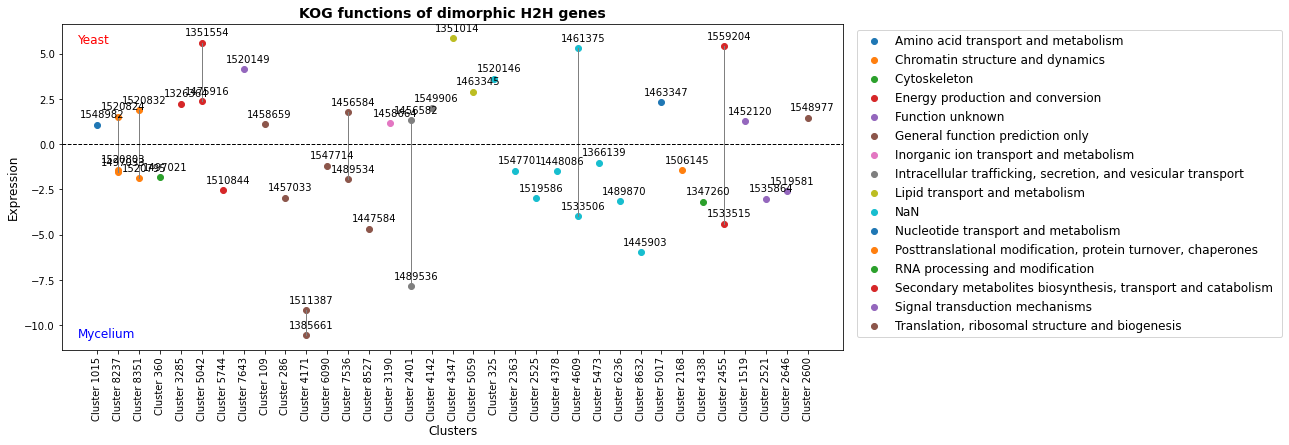

In [29]:
# Copiar el DataFrame para evitar la advertencia
datos_agrupar_dim_copia = datos_agrupar_dim.copy()

# Reemplazar NaN con una etiqueta específica en la copia
datos_agrupar_dim_copia["kogClass"].fillna("NaN", inplace=True)

# Agrupar los datos por KOGgroup
agrupado_por_kogGroup_dim = datos_agrupar_dim_copia.groupby("kogClass")


# Definir el tamaño de la figura
fig, ax = plt.subplots(figsize=(14, 6))

# Recorrer cada grupo
for kogGroup, datos_grupo in agrupado_por_kogGroup_dim:
    # Obtener los IDs y la expresión génica para el grupo actual
    ids_genes = datos_grupo["Cluster"].to_list()
    expresion_genes = datos_grupo["Expression"].to_list()

    # Crear un diagrama de dispersión para el grupo actual
    ax.scatter(ids_genes, expresion_genes, label=str(kogGroup))  # Convertir kogGroup a cadena para NaN
     # Crear un diagrama de dispersión para el grupo actual
    #ax.scatter(ids_genes, expresion_genes, label=kogGroup)

    # Obtener los puntos del mismo cluster
    cluster_points = datos_grupo[["Cluster", "Expression"]].values
     # Agregar etiquetas de texto para cada punto
    for i, ID in enumerate(datos_grupo["Gen_ID"]):
        ax.annotate(ID, (ids_genes[i], expresion_genes[i]), fontsize=10, ha='center', va='bottom', xytext=(5,5), textcoords='offset points')


    # Unir los puntos del mismo cluster con líneas
    for i in range(1, len(cluster_points)):
        if cluster_points[i][0] == cluster_points[i-1][0]:  # Verificar si ambos puntos pertenecen al mismo cluster
            ax.plot([cluster_points[i-1][0], cluster_points[i][0]], [cluster_points[i-1][1], cluster_points[i][1]], color='gray', linestyle='-', linewidth=1)
# Añadir línea horizontal en y=0
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
# Añadir anotaciones para Yeast y Mycelium en el lado izquierdo
ax.annotate('Yeast', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=12, color='red', ha='left', va='center')
ax.annotate('Mycelium', xy=(0.02, 0.05), xycoords='axes fraction', fontsize=12, color='blue', ha='left', va='center')

# Añadir título y etiquetas (en inglés)
plt.title('KOG functions of dimorphic H2H genes', fontsize=14, weight='bold')
ax.set_xlabel("Clusters", fontsize=12)
ax.set_ylabel("Expression", fontsize=12)
plt.xticks(rotation=90)
# Agregar leyenda

leyenda = ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.01, 1))
# Guardar la imagen como SVG
plt.savefig('FuncionesKog_H2H_dimorficos.svg', format='svg', bbox_inches='tight')

# Mostrar la figura
plt.show()

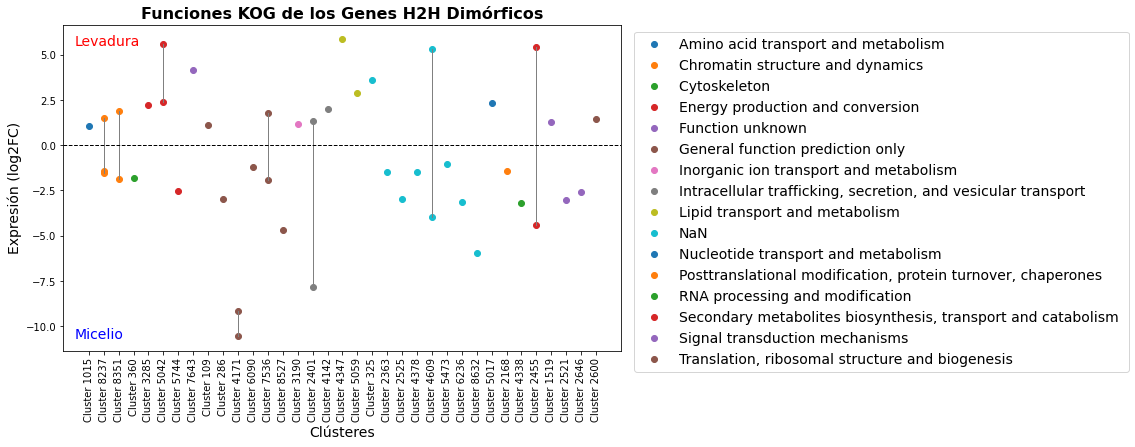

In [31]:
# Copiar el DataFrame para evitar la advertencia
datos_agrupar_dim_copia = datos_agrupar_dim.copy()

# Reemplazar NaN con una etiqueta específica en la copia
datos_agrupar_dim_copia["kogClass"].fillna("NaN", inplace=True)

# Agrupar los datos por KOGgroup
agrupado_por_kogGroup_dim = datos_agrupar_dim_copia.groupby("kogClass")


# Definir el tamaño de la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Recorrer cada grupo
for kogGroup, datos_grupo in agrupado_por_kogGroup_dim:
    # Obtener los IDs y la expresión génica para el grupo actual
    ids_genes = datos_grupo["Cluster"].to_list()
    expresion_genes = datos_grupo["Expression"].to_list()

    # Crear un diagrama de dispersión para el grupo actual
    ax.scatter(ids_genes, expresion_genes, label=str(kogGroup))  # Convertir kogGroup a cadena para NaN
     # Crear un diagrama de dispersión para el grupo actual
    #ax.scatter(ids_genes, expresion_genes, label=kogGroup)

    # Obtener los puntos del mismo cluster
    cluster_points = datos_grupo[["Cluster", "Expression"]].values
     # Agregar etiquetas de texto para cada punto
   # for i, ID in enumerate(datos_grupo["Gen_ID"]):
    #    ax.annotate(ID, (ids_genes[i], expresion_genes[i]), fontsize=12, ha='center', va='bottom', xytext=(5,5), textcoords='offset points')


    # Unir los puntos del mismo cluster con líneas
    for i in range(1, len(cluster_points)):
        if cluster_points[i][0] == cluster_points[i-1][0]:  # Verificar si ambos puntos pertenecen al mismo cluster
            ax.plot([cluster_points[i-1][0], cluster_points[i][0]], [cluster_points[i-1][1], cluster_points[i][1]], color='gray', linestyle='-', linewidth=1)
# Añadir línea horizontal en y=0
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
# Añadir anotaciones para Yeast y Mycelium en el lado izquierdo
ax.annotate('Levadura', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=14, color='red', ha='left', va='center')
ax.annotate('Micelio', xy=(0.02, 0.05), xycoords='axes fraction', fontsize=14, color='blue', ha='left', va='center')

# Añadir título y etiquetas (en inglés)
#plt.title('KOG functions of dimorphic H2H genes', fontsize=14, weight='bold')
plt.title('Funciones KOG de los Genes H2H Dimórficos', fontsize=16, weight='bold')
ax.set_xlabel("Clústeres", fontsize=14)
ax.set_ylabel("Expresión (log2FC)", fontsize=14)
plt.xticks(rotation=90)
# Agregar leyenda

leyenda = ax.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1.01, 1))
# Guardar la imagen como SVG
plt.savefig('FuncionesKog_H2H_dimorficos.svg', format='svg', bbox_inches='tight')

# Mostrar la figura
plt.show()